# Preliminaries

We load matplotlib and execute the inline magic command first so taht we can get to work.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# The Worst Graph You Have Ever Seen!

The graph in the first cell below plots random numbers within a specified range.  Let's assume, for an example, that these are time series data.  I have also created x data which are string data: these are used for x-axis tickmark labels.  The result is illegible x-axis tickmark labels because every x label is printed out and they are on top of one another.  We will fix that problem, and also we'll fix some other issues are well.

I have created a number of issues here, on purpose, in case you need to control these aspects of a graph in the future.  First, I have turned on tickmarks  for all the spines.  This is currently not the current default setting for matplotlib, although it has been in past versions.  So, in case the old default returns, you should know how to control turning tickmarks off on axes where they are not needed. Note, also, the tickmarks I have created are on the inside of the axes.  We will change the orientation so that they are on the outside of the axes.  To make the graph even less aesthetic, I have turned on grid lines, in case you need to know how to turn these off in case they become the default.  there are so many vertical grid liens that it looks as though there is a gray background.

For practice, let's also change the color of the line to black.

Let's, further, suppose that there is something apecial about the data point with indices 50 through 150 and so we want to highlight those points in some manner.  We will try vertical lines and shading.

While a legend for a graph with only one line series is pointless, we will also demonstrate how to add a legend and position it in a way that it does not obstruct the line being plotted.

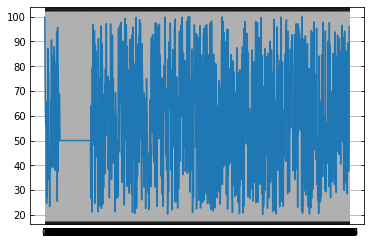

In [5]:
import random
xLo = 20.0
xHi = 100.0
numPoints = 1000
y = [xLo + (xHi-xLo)*random.random() if i < 50 or i >150 else 50.0 for i in range(numPoints)]
x = [str(i) for i in range(len(y))]

fig,ax = plt.subplots()

""" I have created non-aesthetic qualities with the lines of code below """
ax.grid(True)
ax.xaxis.set_tick_params(which = 'both', top = True, bottom = True, labelbottom = True, direction='in')
ax.yaxis.set_tick_params(which = 'both', right = True, left = True, labelleft = True, direction='in')

ax.plot(x,y)

Text(0.5, 0.98, 'Time Series Plot of Temperature')

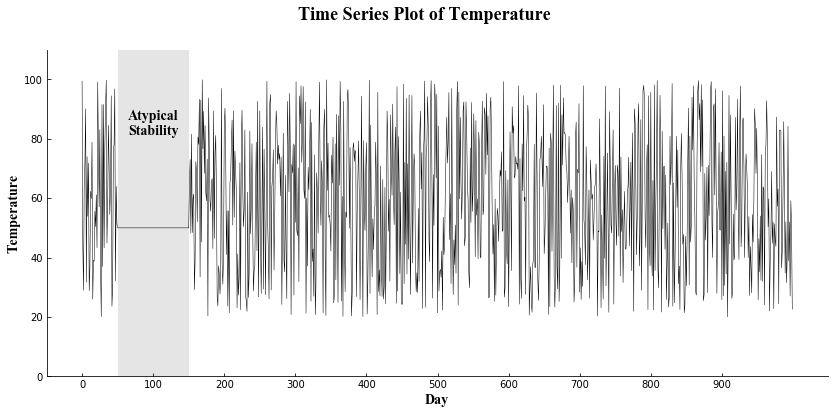

In [28]:
import numpy as np
#import random
xLo = 20.0
xHi = 100.0
numPoints = 1000
y = [xLo + (xHi-xLo)*random.random() if i < 50 or i >150 else 50.0 for i in range(numPoints)]
x = [i for i in range(len(y))]

fig,ax = plt.subplots()
#ax.plot(x,y)
ax.plot(x,y,color='k',linewidth=.5,label='Time Series Plot')  # ,marker='.' https://matplotlib.org/api/markers_api.html

""" I have created non-aesthetic qualities with the lines of code below """
#ax.grid(True)
ax.grid(False)
#ax.xaxis.set_tick_params(which = 'both', top = True, bottom = True, labelbottom = True, direction='in')
#ax.yaxis.set_tick_params(which = 'both', right = True, left = True, labelleft = True, direction='in')
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True, direction='in')
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True, direction='in')

""" Enhance axes object """
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Day',fontsize='14',fontname='Times New Roman')
ax.set_ylabel('Temperature',fontsize='14',fontname='Times New Roman')
ax.set_xticks(x[::100])
ax.set_xticklabels(x[::100])
ax.set_ylim(0,max(y)+10)
#ax.axvline(x=50,linewidth=1,color='k',label='Low',linestyle='-')
#ax.axvline(x=150,linewidth=1,color='k',label='High',linestyle='--')
#ax.legend(loc=4)
ax.axvspan(50,150,ymin=0,ymax = 300,facecolor='k',alpha=0.1)
ax.text(100,85,'Atypical\nStability',fontsize=14,verticalalignment='center',horizontalalignment='center',fontname='Times New Roman')

""" Enhance figure object """
fig.set_size_inches(14,6)
fig.suptitle("Time Series Plot of Temperature",fontsize='18',fontname='Times New Roman')
#fig.savefig('lineplot.jpg',dpi=600)


# Formatting Numerical Axis Tickmark Labels

We saw this graph previously.  Note that the x-axis tickmark labels overlap

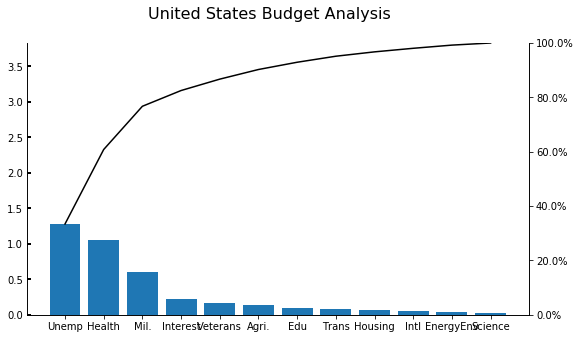

In [31]:
# Data
bdata = [1.28,1.05,0.6093,0.22195,0.16063,0.1357,0.10226,0.08499,0.06148,0.05022,0.04485,0.02981]
blabels = ['Unemp','Health','Mil.','Interest', 'Veterans','Agri.','Edu','Trans','Housing','Intl','EnergyEnv','Science']
xs = range(len(bdata))
bdata_cum = []
for i in range(len(bdata)):
    bdata_cum.append(sum(bdata[0:i+1])/sum(bdata))

fig, ax = plt.subplots()
fig.suptitle('United States Budget Analysis', fontsize = 16)

# Set bar chart parameters
ax.bar(xs,bdata, align='center')
ax.set_ylim(0,sum(bdata))
ax.set_xticks(xs)
ax.set_xticklabels(blabels)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.tick_params(axis = 'y', which = 'both', direction = 'in', width = 2, color = 'black')

# Set line chart paramters and assign the second y axis
ax1 = ax.twinx()
ax1.plot(xs,bdata_cum,color='k')
ax1.set_ylim(0,1)
ax1.set_yticklabels(['{:1.1f}%'.format(x*100) for x in ax1.get_yticks()])
ax1.spines['top'].set_visible(False)
ax1.grid(False)

#fig.set_figwidth(9)
#fig.set_figheight(5)
fig.set_size_inches(9,5)
fig.savefig('pareto.jpg', dpi=2000)
plt.show()

This is not a good solution, but you can rotate the axis tickmark labels by 45 degrees as done in the cell below.

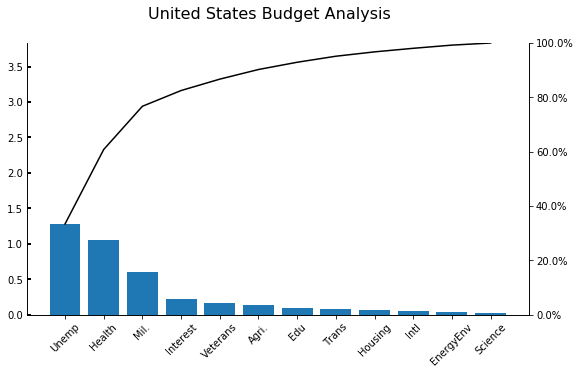

In [35]:
# Data
bdata = [1.28,1.05,0.6093,0.22195,0.16063,0.1357,0.10226,0.08499,0.06148,0.05022,0.04485,0.02981]
blabels = ['Unemp','Health','Mil.','Interest', 'Veterans','Agri.','Edu','Trans','Housing','Intl','EnergyEnv','Science']
xs = range(len(bdata))
bdata_cum = []
for i in range(len(bdata)):
    bdata_cum.append(sum(bdata[0:i+1])/sum(bdata))

fig, ax = plt.subplots()
fig.suptitle('United States Budget Analysis', fontsize = 16)

# Set bar chart parameters
ax.bar(xs,bdata, align='center')
ax.set_ylim(0,sum(bdata))
ax.set_xticks(xs)
ax.set_xticklabels(blabels, rotation = 45)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.tick_params(axis = 'y', which = 'both', direction = 'in', width = 2, color = 'black')

# Set line chart paramters and assign the second y axis
ax1 = ax.twinx()
ax1.plot(xs,bdata_cum,color='k')
ax1.set_ylim(0,1)
ax1.set_yticklabels(['{:1.1f}%'.format(x*100) for x in ax1.get_yticks()])
ax1.spines['top'].set_visible(False)
ax1.grid(False)

#fig.set_figwidth(9)
#fig.set_figheight(5)
fig.set_size_inches(9,5)
fig.savefig('pareto.jpg', dpi=2000)
plt.show()

The best solution is not to rotate the labels, but to limit how many bars are plotted.  After all, the point is to focus on the tallest bars.  The Pareto chart below plots only the most frequent items.

But, there still are some issues to resolve:

- We need to possibly delete the top spine, although one might argue we shuld keep it given we must keep the right spine.
- Insert x-axis caption
- Insert y-axis caption
- Indicate units on (1st) y-axis
- Put 2nd y-axis tickmark labels in percentage format
- We want to save a very high resolution JPG image for a presentation

### Formatting Numbers 101

In [30]:
x = 43210.123456789
'{:.3f}'.format(x)

'43210.123'

In [35]:
y = [random.random() for i in range(10)]
print(y)

[0.7834552800936526, 0.5259297213947906, 0.7964748806300175, 0.9682958246543969, 0.24432446956591014, 0.9117733425696584, 0.383225415651698, 0.7384273132580704, 0.9358797179308572, 0.470592921686129]


In [38]:
yStr = ['{:.6f}'.format(val) for val in y]
yStr

['0.783455',
 '0.525930',
 '0.796475',
 '0.968296',
 '0.244324',
 '0.911773',
 '0.383225',
 '0.738427',
 '0.935880',
 '0.470593']

In [39]:
perc = ['{:.2f}%'.format(val*100) for val in y]
perc

['78.35%',
 '52.59%',
 '79.65%',
 '96.83%',
 '24.43%',
 '91.18%',
 '38.32%',
 '73.84%',
 '93.59%',
 '47.06%']

### Fix the 2nd y-axis

In [37]:
# U.S. Budget Data in Trillions of Dollars
bdata = [1.28,1.05,0.6093,0.22195,0.16063,0.1357,0.10226,0.08499,0.06148,0.05022,0.04485,0.02981]
blabels = ['Unemp','Health','Mil.','Interest', 'Veterans','Agri.','Edu','Trans','Housing','Intl','EnergyEnv','Science']

""" Create cumulative percentage data series """
bdata_cum = []
for i in range(len(bdata)):
    bdata_cum.append(sum(bdata[0:i+1])/sum(bdata))

# Create plot and set figure object settings
fig, ax = plt.subplots()
fig.suptitle('United States Budget Analysis', fontsize = 16)
fig.set_size_inches(9,5)
#fig.set_figwidth(9)
#fig.set_figheight(5)

# Set bar chart parameters
ax.bar(blabels,bdata, align='center')
ax.set_ylim(0,sum(bdata))   # set limits on first y-axis to align with second y-axis

# Construct a second y-axis
ax1 = ax.twinx()
ax1.plot(bdata_cum,color='k')
ax1.set_ylim(0,1)  
ax1.set_yticklabels([]'{:.1f}'.format(x*100) for x in ax1.get_yticks()]) for # The second y-axis is a percentage scale from zero to 100%

plt.show()

SyntaxError: invalid syntax (<ipython-input-37-3e9ef56c937d>, line 25)

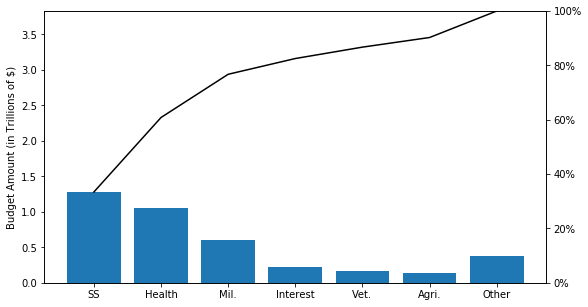

In [39]:
import matplotlib.pyplot as plt

# Data
blabels1 = ['SS','Health','Mil.','Interest', 'Vet.','Agri.','Other']
bindex = 6
bother = sum(bdata[bindex:])
bdata1 = bdata[:bindex] + [bother]
xs = range(len(bdata1))
bdata_cum = []
for i in range(len(bdata1)):
    bdata_cum.append(sum(bdata1[0:i+1])/sum(bdata1))

fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(5)

# Bar chart settings
ax.set_xticks(xs)
ax.set_xticklabels(blabels1)
ax.bar(xs,bdata1, align='center')
ax.set_ylim(0,sum(bdata1))
ax.set_ylabel('Budget Amount (in Trillions of $)')

# Line chart settings
ax1 = ax.twinx()
ax1.plot(xs,bdata_cum,color='k')
ax1.set_ylim(0,1)
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])
plt.show()

In [40]:
[x for x in ax1.get_yticks()]

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]